Topic: Analyzing People's review in large datasets and summarizing them into small notes, which can be used to do quick analysis

Strategy:

1. Taking dataset from Open Source community
2. Implement the dataset with Machine Learning algo possible
3. Checking there performance and make a conclusive stament



1. Dataset Import

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Import Libraries 2

from matplotlib import style #For creating multiple Styles to Data Visualisations %matplotlib inline
import os
import warnings
warnings.filterwarnings("ignore")

In [10]:
#importing nltk libraries
import re #regular expression for data cleaning
from sklearn.feature_extraction.text import CountVectorizer #feature extraction
import nltk #natural language toolkit
from nltk.corpus import stopwords #stopwords
from nltk.stem import WordNetLemmatizer #lemmatizing words

In [27]:
pip install clean-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 4.6 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171034 sha256=667bc6898ffff94ac4d28926f123649c6f56c223be3741a7d38f400ed1e52396
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


In [28]:
#removing emojis
from cleantext import clean

In [11]:
#To display full output in Jupyter, not just last result of a particular cel
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [12]:
# To display upto 10 rows while showing output
pd.options.display.max_rows = 10

In [13]:
#Imporing Dataset
#df = pd.read_csv('/content/drive/MyDrive/Datasets/Project_Review_classification/Amazon_Review.csv', sep='\t', header = None)
data = pd.read_csv('/content/drive/MyDrive/Datasets/Project_Review_classification/Amazon_Review.csv')


In [14]:
data.head(2)

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."


In [15]:
#calculating dimensions
rows, columns = data.shape
print('Rows = ' , rows, 'Columns =' , columns )


Rows =  14675 Columns = 2


In [16]:
#checking info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14675 entries, 0 to 14674
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  14675 non-null  int64 
 1   review     14675 non-null  object
dtypes: int64(1), object(1)
memory usage: 229.4+ KB


In [17]:
#checking null values
data.isna().sum()

sentiment    0
review       0
dtype: int64

In [18]:
# Total Sentiment reviews ratio
data['sentiment'].value_counts(normalize = True)

0    0.52552
1    0.47448
Name: sentiment, dtype: float64

52.5% negative, 47.44% positive review indicating mixed reviews by customers on the product with slightly negative talk overleading

In [20]:
#checking duplicated values based on all columns
duplicate = data[data.duplicated(keep = 'last')]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,sentiment,review
3,1,Good
10,0,Wrost
19,1,Good smartphone
20,1,good
46,0,Poor
...,...,...
14529,1,Good
14530,0,Good
14547,0,Waste of money
14553,0,Good


It is common to use phrases like Good, Nice as a review by multiple people. However, if we closely notice, some reviews with higher word length (customised feedback) repeated twice.

This might happen due same person posting it twice. Excluding duplicates of such reviews as they are repetitive

In [21]:
double_data = duplicate[duplicate['review'].str.len() > 60]

In [22]:
pd.options.display.max_colwidth = 1000 # prints
double_data

,sentiment,review
587,1,"Superb product. Few of the feature are awesome. Duel camera, front 13mp camera, back and front flash, dedicated music button, dedicated memory card slot, free transparent case and split window for multitasking. These are some feature i like the product in my budget."
3802,0,"It's the jack of all trades but king of none. Battery back up could have been better if they used some other processor. Battery drains quite fast. Camera is better than average. And I think there is no option to keep external media as your ringtone. Only custom build ringtones available to set as your ringtone. Kinda bums me out.Update after 3 day use:Battery back up is really horrible, normal usage like whatsapp and Instagram browsing consumes more than 25% battery in an hour or so.Then there is turbocharging issue, it starts with fast charging then after 10-20 minutes,depending upon mood, rate decreases, it took 7 hours to charge it by 40% in total.Would really appreciate if Amazon could take this matter seriously and take it up with Lenovo and return the money of its customers for defective models. I personally would not trust my 14K bucks with Lenovo or Moto from this point on."
4435,0,"Hello,The phone starts resetting itself randomly. This issue starts after after 3 days of use, especially when you use it for longer time like watching a you tube video for an hour or two. The issue starts to repeat after 1 or 2 days, then I tried few option mentioned in Lenovo help APP which is pre-installed(I am feeling like a stupid for having done this) , after that for 4 or 5 days it didn't show this issue. Now it back with a bang and almost resets itself every night. Use the phone in night, then lock it and keep aside and when you take the phone again in the morning, boom, it is dead already. And when you manually power-on there is enough juice left in the battery. Not sure what to do with this kind of issue, the phone is absolutely useless.When I approached amazon for return, they are quoting policy and suggest me that I should run pillar to post to get problem rectified (not sure even it is rectifiable issue), The below Amazon's tagline tag-line sounds funny"" Earth's Most C..."
5951,0,"Over Heating Issue while light usage like just in internet connection, and always warm while connected to internet. this update is After usage of 10 days. Dont prefer this one."
6223,0,"Over Heating Issue while light usage like just in internet connection, and always warm while connected to internet. this update is After usage of 10 days. Dont prefer this one."
9277,0,"Hello,The phone starts resetting itself randomly. This issue starts after after 3 days of use, especially when you use it for longer time like watching a you tube video for an hour or two. The issue starts to repeat after 1 or 2 days, then I tried few option mentioned in Lenovo help APP which is pre-installed(I am feeling like a stupid for having done this) , after that for 4 or 5 days it didn't show this issue. Now it back with a bang and almost resets itself every night. Use the phone in night, then lock it and keep aside and when you take the phone again in the morning, boom, it is dead already. And when you manually power-on there is enough juice left in the battery. Not sure what to do with this kind of issue, the phone is absolutely useless.When I approached amazon for return, they are quoting policy and suggest me that I should run pillar to post to get problem rectified (not sure even it is rectifiable issue), The below Amazon's tagline tag-line sounds funny"" Earth's Most C..."
9428,1,Great experience with tis amazing product from lenovo.it is equipped with almost every features that a smartphone required.deca core processor long lasting battery and 64GB internal memory with 4GB RAM is just awesome.I would certainly recommend this phone for users having usage and game lovers
12115,1,Great experience with tis amazing product from lenovo.it is equipped with almost every features that

In [23]:
double_data.index.values.tolist()

[587, 3802, 4435, 5951, 6223, 9277, 9428, 12115]

In [24]:
data.drop(data.index[double_data.index.values.tolist()], inplace=True)

2. Normalize casings for the review text and extract the text into a list for easier manipulation

In [25]:
review_lc = [i.lower() for i in data['review']]

In [26]:
# removing punctuation
import string
nopunc = (str.maketrans('','',string.punctuation))
review_nopunc = [w.translate(nopunc) for w in review_lc]

In [29]:
review_no_emoji = [clean(text, no_emoji=True) for text in review_nopunc]
# review_no_emoji = [clean(text) for text in review_nopunc]

3. Tokenize the reviews using NLTKs word_tokenize function

In [32]:
!pip install nltk
nltk.download('punkt')
from nltk import word_tokenize
review_tokens = [nltk.word_tokenize(i) for i in review_no_emoji]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Alert: Removing stop words may change the context some times.¶
For Example:

Before removing stopwords: "Not Good smartphone to buy"
After removing stopwords: "Good smartphone buy" So, Updating the stopwords set by excluding stopwords which brings negative context
Also we can remove domain specific expectable words like 'mobile', 'phone','lenovo' as they don't add value to the context.

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [37]:
nltk.download('pos_tag')

[nltk_data] Error loading pos_tag: Package 'pos_tag' not found in
[nltk_data]     index


False

In [35]:
#removing stopwords
from nltk.corpus import stopwords
SW = stopwords.words("english") #stopwords
SW.extend(['phone','lenovo','mobile'])
SW_negation = ['no','out','down','below','against','nor','not','ain','aren',"aren't",'couldn',"couldn't",'didn',"didn't",'doesn',"doesn't",'hadn',"hadn't",'hasn',"hasn't",'haven',"haven't",'isn',"isn't",'mightn',"mightn't",'mustn',"mustn't",'needn', "needn't",'shan',"shan't",'shouldn',"shouldn't",'wasn',"wasn't",'weren',"weren't",'won',"won't",'wouldn',"wouldn't"]

SW_updated = [i for i in SW if i not in SW_negation]
review_no_SW  = []
for sentence_list in review_tokens:
    word_list = []
    for word in sentence_list:
        if word not in SW_updated :
            word_list.append(word)
    review_no_SW .append(word_list)


4. Perform parts-of-speech tagging on each sentence using the NLTK POS tagger.


In [39]:
!pip install nltk
!python -m nltk.downloader averaged_perceptron_tagger

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [40]:
from nltk import pos_tag
review_pos_tag = [nltk.pos_tag(i) for i in review_no_SW if not str(i).isdigit()]

In [41]:
pd.options.display.max_colwidth = 10
review_pos_tag[0] # Just for understanding how list is

[('good', 'JJ'), ('need', 'NN'), ('updates', 'NNS'), ('improvements', 'NNS')]

5. For the topic model, we should want to include only nouns.

1. Find out all the POS tags that correspond to nouns.
2. Limit the data to only terms with these tags.

In [42]:
def Get_Nouns(POSTags):
    Noun_Forms=['NN','NNP','NNS','NNPS']
    words = [word for word,tag in POSTags if tag in Noun_Forms]
    return words

In [43]:
review_nouns = [Get_Nouns(i) for i in review_pos_tag]

In [44]:
review_nouns[0:3]

[['need', 'updates', 'improvements'],
 ['hell',
  'backup',
  'hours',
  'uses',
  'lie',
  'amazon',
  'battery',
  'booster',
  'charger',
  'hours',
  'usplease',
  'dont'],
 ['cash']]

In [45]:
def Get_Verbs(POSTags):
    Verb_Forms=['VB','VBP','VBZ','VBG','VBD','VBN']
    words = [word for word,tag in POSTags if tag in Verb_Forms]
    return words

In [46]:
review_verbs = [Get_Verbs(i) for i in review_pos_tag]

6. Lemmatize.

1. Different forms of the terms need to be treated as one.
2. No need to provide POS tag to lemmatizer for now.


In [ ]:
nltk.download('wordnet')

In [56]:
from nltk.stem import wordnet
#lem = wordnet.WordNetLemmatizer()
lem = WordNetLemmatizer()

In [53]:
def lem_list_of_words(words_list):
    return [lem.lemmatize(i,pos="n") for i in words_list]

In [60]:
!pip install nltk
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [61]:
!jupyter nbconvert --execute my_notebook.ipynb

[NbConvertApp] WARNING | pattern 'my_notebook.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
   

In [62]:
review_lem = [lem_list_of_words(words_list) for words_list in review_nouns]

In [64]:
review_lem[0:3]

[['need', 'update', 'improvement'],
 ['hell',
  'backup',
  'hour',
  'us',
  'lie',
  'amazon',
  'battery',
  'booster',
  'charger',
  'hour',
  'usplease',
  'dont'],
 ['cash']]

In [65]:
def lem_list_of_verb_words(words_list):
    return [lem.lemmatize(i, pos ="v") for i in words_list]

review_lem_verb = [lem_list_of_verb_words(words_list) for words_list in review_verbs]

7. Remove stopwords and punctuation (if there are any)¶
Performed actions at right place
EDA: Curious to know which words, which nouns, which verbs were frequently used to describe product!¶

In [66]:
word_list = [word for pos_tag_tuple_list in review_pos_tag for word,pos_tag in pos_tag_tuple_list]

In [67]:
nouns_list = [word for noun_sent_list in review_lem for word in noun_sent_list]

In [68]:
verb_list =  [word for verb_sent_list in review_lem_verb for word in verb_sent_list]

<Figure size 2000x1000 with 0 Axes>

<BarContainer object of 20 artists>

Text(0.5, 1.0, '20 most frequently used words')

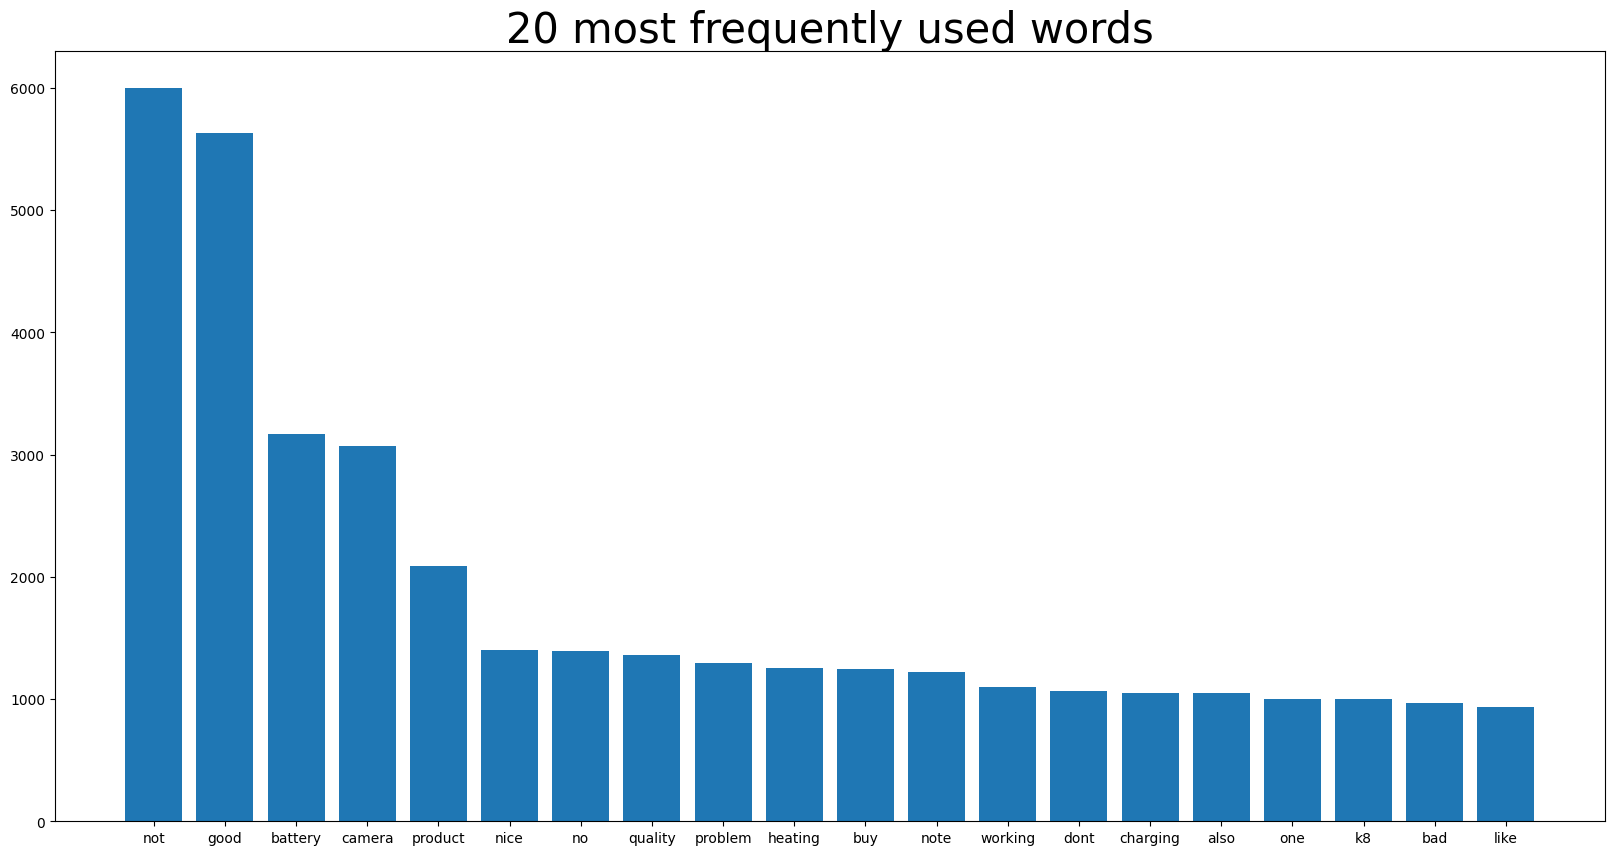

In [69]:
from collections import Counter
word_freq_cnt = Counter(word_list)
# Plotting the most commonly used words:
import matplotlib.pyplot as plt
%matplotlib inline
words=[]
values=[]
for item, frequency in word_freq_cnt.most_common(20):
    words.append(item)
    values.append(frequency)
plt.figure(figsize= (20,10))
plt.bar(words, values)
plt.title('20 most frequently used words', size=30)
plt.show()

<Figure size 2000x1000 with 0 Axes>

<BarContainer object of 15 artists>

Text(0.5, 1.0, '15 most frequently used Nouns')

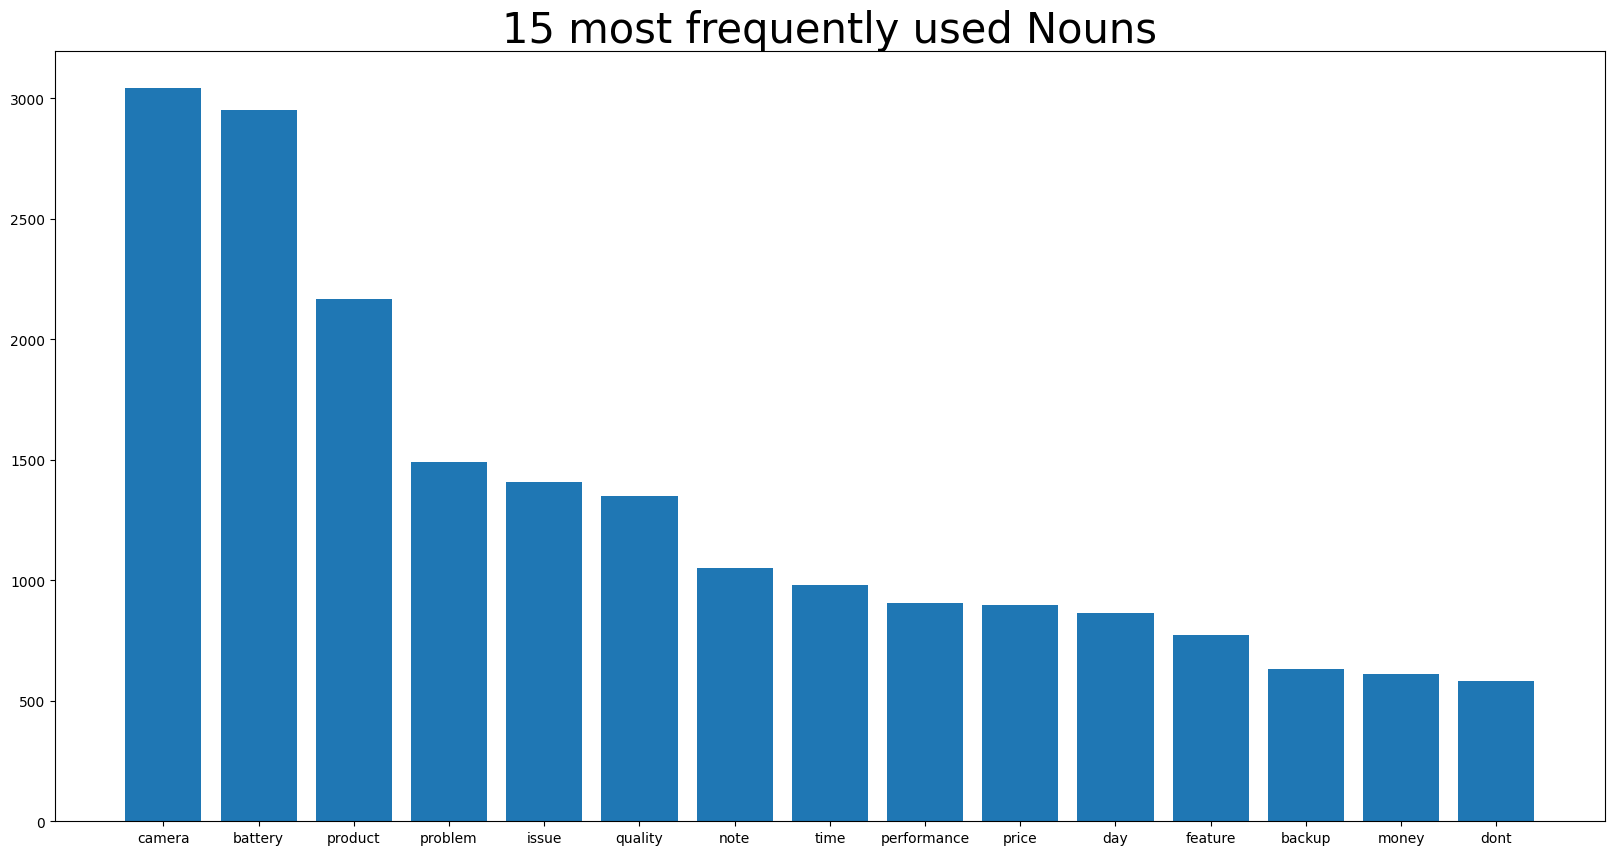

In [70]:
noun_freq_cnt = Counter(nouns_list)
# Plotting the most commonly used nouns:
import matplotlib.pyplot as plt
%matplotlib inline
words=[]
values=[]
for item, frequency in noun_freq_cnt.most_common(15):
    words.append(item)
    values.append(frequency)
plt.figure(figsize= (20,10))
plt.bar(words, values)
plt.title('15 most frequently used Nouns', size=30)
plt.show()

<Figure size 2000x1000 with 0 Axes>

<BarContainer object of 15 artists>

Text(0.5, 1.0, '15 most frequently Verbs')

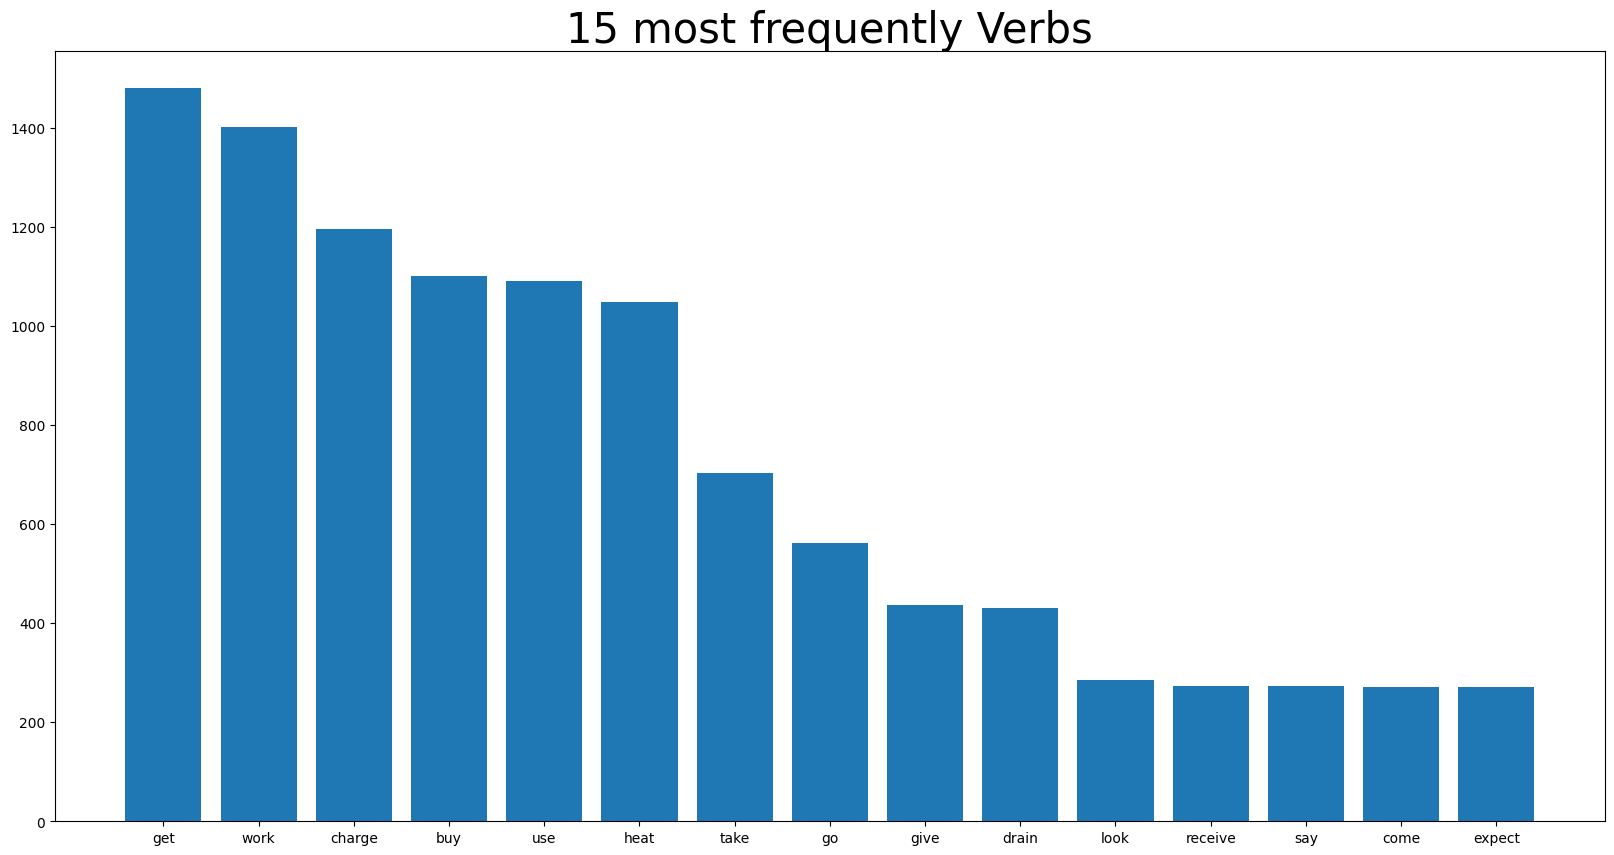

In [71]:
verb_freq_cnt = Counter(verb_list)
# Plotting the most commonly used nouns:
import matplotlib.pyplot as plt
%matplotlib inline
words=[]
values=[]
for item, frequency in verb_freq_cnt.most_common(15):
    words.append(item)
    values.append(frequency)
plt.figure(figsize= (20,10))
plt.bar(words, values)
plt.title('15 most frequently Verbs', size=30)
plt.show()

In [72]:
data['review']

0        Good b...
1        Worst ...
2        when I...
3             Good
4        The wo...
           ...    
14670    I real...
14671    The Le...
14672    Awesom...
14673    This p...
14674    Good p...
Name: review, Length: 14667, dtype: object

8. Create a topic model using LDA on the cleaned-up data with 12 topics
1. Print out the top terms for each topic.
2. What is the coherence of the model with the c_v metric?


Linear Dirichlet Allocation(LDA):¶
LDA is a matrix factorization technique. Documents(Reviews) will be represented as document-term matrix. LDA converts document-term matrix into two lower-dimensional matrix, M1 and M2 where M1 is a document-topic matrix and M2 is a topic-term matrix.It's an iteration process, where each word w of each doc d, word assignment is updated till it reaches a convergence point using Gibs Sampling Technique.

Assumption: It worksubder the assumption each document is generated by a statistical generative process i.e, each document is a mixture of topics and each topic is a mixture of words

Note: It is not a determinisitc model. Every time it will endup generating different results for topics



In [73]:
import gensim

# Creating dictionary and applying filter to select few words
dic_res = gensim.corpora.Dictionary(review_lem) #Creates a dictionary for all words in Corpora
dic_res.filter_extremes(no_below = 25, # Keep tokens which are contained in at least no_below documents.
                        no_above = 0.8, # Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).
                        keep_n = None) #Keep only the first keep_n most frequent tokens.

# Convert document into the bag-of-words (BoW) format = list of (token_id, token_count) tuples.
bow_corpus = [dic_res.doc2bow(doc) for doc in review_lem]
bow_corpus[0:3] # corpus for input data

[[(0, 1), (1, 1), (2, 1)],
 [(3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2)],
 [(10, 1)]]

In [74]:
print("No of words in dictionary after filtering is: {}".format(len(dic_res)))

No of words in dictionary after filtering is: 384


In [75]:
# Demonstrate how words are connected to numbers in dictionary after filtering
for k, v in dic_res.iteritems():
    if k<10:
        print(k, v)


0 improvement
1 need
2 update
3 amazon
4 backup
5 battery
6 charger
7 dont
8 hell
9 hour


In [76]:
# Building LDA Model:
lda_model =  gensim.models.LdaMulticore(bow_corpus, num_topics = 12,id2word = dic_res, iterations= 5000, passes = 10,workers = 2)

In [77]:
#Evaluation of model using Coherence CV metric:
from gensim.models import CoherenceModel
coherence_model = CoherenceModel(model= lda_model,texts= review_lem,dictionary=dic_res,coherence='u_mass')
print('Coherence score with 12 Topics is: ', coherence_model.get_coherence())

Coherence score with 12 Topics is:  -5.713853051933422


In [78]:
# Generating words of  Each topic:
for idx, topic in lda_model.print_topics(-1):
            print("Topic: {} \nWords: {}".format(idx, topic ))
            print("\n")

Topic: 0 
Words: 0.428*"product" + 0.070*"device" + 0.067*"heating" + 0.062*"speaker" + 0.053*"heat" + 0.031*"month" + 0.019*"problem" + 0.017*"service" + 0.017*"amazon" + 0.016*"game"


Topic: 1 
Words: 0.170*"note" + 0.167*"price" + 0.120*"feature" + 0.077*"k8" + 0.061*"range" + 0.024*"phone" + 0.018*"love" + 0.017*"ok" + 0.014*"redmi" + 0.014*"review"


Topic: 2 
Words: 0.145*"buy" + 0.116*"dont" + 0.062*"glass" + 0.053*"awesome" + 0.041*"experience" + 0.037*"please" + 0.033*"gorilla" + 0.033*"earphone" + 0.026*"screen" + 0.025*"pls"


Topic: 3 
Words: 0.392*"problem" + 0.067*"work" + 0.063*"battery" + 0.044*"excellent" + 0.026*"look" + 0.024*"month" + 0.020*"hang" + 0.019*"use" + 0.017*"class" + 0.017*"camera"


Topic: 4 
Words: 0.132*"money" + 0.111*"issue" + 0.065*"return" + 0.063*"waste" + 0.051*"value" + 0.040*"customer" + 0.037*"product" + 0.033*"amazon" + 0.029*"super" + 0.028*"purchase"


Topic: 5 
Words: 0.243*"quality" + 0.135*"camera" + 0.050*"budget" + 0.046*"delivery" +

9. Analyze the topics through the business lens i.e., determine which of the topics can be combined.

In [80]:
pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 35.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.2 which is incompatible.


In [82]:
#pip install pickle
#pip install pyLDAvis

SyntaxError: invalid syntax (<ipython-input-82-72a5d184eb75>, line 2)

In [84]:
import pyLDAvis.gensim
import pickle
import pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [89]:
!pip install pandas==1.5.3
import pandas as pd

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 74.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [90]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic_res)
LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10    -0.072941  0.238636       1        1  14.224090
11     0.013065 -0.018341       2        1  10.490625
6      0.244112  0.022889       3        1  10.472122
1     -0.018365 -0.217662       4        1   9.038403
4     -0.248885 -0.046406       5        1   7.956767
...         ...       ...     ...      ...        ...
7     -0.166323  0.010257       8        1   7.337407
9      0.226726  0.120155       9        1   7.310130
2     -0.140731 -0.233008      10        1   6.300411
5      0.182315 -0.135532      11        1   5.879794
3     -0.020769  0.222593      12        1   5.875552

[12 rows x 5 columns], topic_info=       Term       Freq      Total Category  logprob  loglift
37  product  2028.0...  2028.0...  Default  30.0000  30.0000
11  problem  1532.0...  1532.0...  Default  29.0000  29.0000
44   camera  3072.0...  3072.0...  Default  28.0000  28.0000
5   battery  2865.0...  2865.0...  Default  27.0000  27.0000
63  quality  1338.0...  1338.0...  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
34     time  50.947247  947.42...  Topic12  -4.2019  -0.0886
44   camera  58.773560  3072.2...  Topic12  -4.0590  -1.1221
47   doesnt  27.176618  298.18...  Topic12  -4.8304   0.4390
62      day  26.958258  855.59...  Topic12  -4.8384  -0.6231
50  display  24.096558  323.41...  Topic12  -4.9507   0.2375

[504 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
3         1  0.002101     amazon
3         2  0.002101     amazon
3         4  0.044112     amazon
3         5  0.323485     amazon
3         7  0.149139     amazon
...     ...       ...        ...
21        8  0.013404       year
21       12  0.428932       year
362       5  0.774103  yesterday
362      11  0.175932  yesterday
272       2  0.962001    youtube

[1229 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 12, 7, 2, 5, 9, 1, 8, 10, 3, 6, 4])

In [91]:
pyLDAvis.save_html(LDAvis_prepared, 'LDA_model_vis'+'.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


10. Create topic model using LDA with the optimal number of topics

In [92]:
def compute_coherence_score(corpus,id2word,k):
    lda_model = gensim.models.LdaMulticore(corpus = corpus, num_topics = k,id2word =dic_res, passes=10, random_state= 1607, iterations= 50, per_word_topics= True)
    coherence_model_lda = CoherenceModel(model= lda_model, texts= review_lem,dictionary= dic_res,coherence='u_mass')
    coherence_score = coherence_model_lda.get_coherence()
    return coherence_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [93]:
# Find the number of topic for which the coherence score is highest
# cs is empty list which captures the number of topics and their corresponding score as a tuple.
cs=[]
for i in range(4,11):
    score = compute_coherence_score(corpus=bow_corpus,id2word=dic_res,k=i)
    print('\nCoherence score with ', i, 'Topics is: ', score )
    cs.append((i,score))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence score with  4 Topics is:  -3.476789214751751

Coherence score with  5 Topics is:  -3.476490103889997

Coherence score with  6 Topics is:  -4.090184082028403

Coherence score with  7 Topics is:  -4.8665225085522

Coherence score with  8 Topics is:  -5.192553673693089

Coherence score with  9 Topics is:  -5.358119302128367

Coherence score with  10 Topics is:  -5.585729554854469


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Coherence Score vs  Number of Topics')

Text(0.5, 0, 'Number of Topics')

Text(0, 0.5, 'Coherence Score')

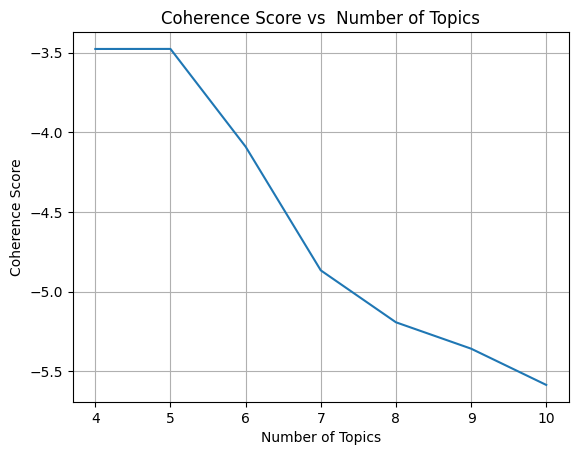

In [94]:
# Plot the distribution of score for topics
x = [val[0] for val in cs]
y= [val[1] for val in cs]
plt.plot(x,y)
plt.title('Coherence Score vs  Number of Topics')
plt.grid(True)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()


u_mass Coherence score lies between -14 to 14 typically and close to zero is considered as better. Hence, we can go ahead with 4 topics.¶
Alert:
As LDA is a non determistic model like human brains 😛, everytime you may end up with different no. of optimal topics!

In [95]:
from operator import itemgetter
tps = max(cs, key=itemgetter(1))[0]
print('Optimum number of topics for highest Coherence score is: ', tps)

Optimum number of topics for highest Coherence score is:  5


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


11. The business should be able to interpret the topics

In [96]:
# Building the final LDA model using the optimum number of topics
# Here we have tuned few hyperparamaters for better accuracy of the model.
lda_model_final = gensim.models.LdaMulticore(corpus = bow_corpus, num_topics = tps,id2word = dic_res, passes=10,random_state = 1607, iterations= 50, per_word_topics = True)
coherence_model_lda_final = CoherenceModel(model= lda_model_final, texts= review_lem,dictionary= dic_res,coherence='u_mass')
coherence_score_final = coherence_model_lda_final.get_coherence()
print('Coherence score for ',tps,' Topics is: ', coherence_score_final)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence score for  5  Topics is:  -3.782778434287762


In [97]:
# Generating words of  Each topic:
for idx, topic in lda_model_final.print_topics(-1):
            print("Topic: {} \nWords: {}".format(idx, topic ))
            print("\n")

Topic: 0 
Words: 0.207*"camera" + 0.109*"product" + 0.097*"quality" + 0.068*"performance" + 0.021*"display" + 0.017*"mode" + 0.016*"awesome" + 0.016*"processor" + 0.014*"glass" + 0.012*"ram"


Topic: 1 
Words: 0.103*"price" + 0.096*"feature" + 0.071*"money" + 0.037*"range" + 0.034*"waste" + 0.027*"value" + 0.023*"speaker" + 0.023*"screen" + 0.021*"budget" + 0.021*"option"


Topic: 2 
Words: 0.196*"battery" + 0.050*"note" + 0.040*"backup" + 0.034*"day" + 0.032*"hour" + 0.031*"time" + 0.028*"camera" + 0.024*"charge" + 0.023*"life" + 0.022*"k8"


Topic: 3 
Words: 0.141*"problem" + 0.131*"issue" + 0.052*"network" + 0.047*"month" + 0.043*"heating" + 0.041*"charger" + 0.027*"use" + 0.024*"heat" + 0.020*"time" + 0.019*"sim"


Topic: 4 
Words: 0.060*"product" + 0.041*"buy" + 0.041*"service" + 0.035*"amazon" + 0.032*"dont" + 0.030*"device" + 0.030*"call" + 0.027*"return" + 0.026*"note" + 0.026*"day"




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 2000x4000 with 0 Axes>

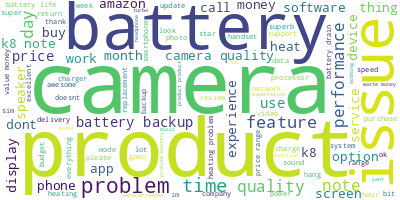

<Figure size 2000x4000 with 0 Axes>

In [98]:
# Word Cloud to understand what topics are discussed in general
from wordcloud import WordCloud # Import the wordcloud library
long_string = ','.join(nouns_list) # Join the different processed titles together.
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue') # Create a WordCloud object
plt.figure(figsize=[20,40])
wordcloud.generate(long_string) # Generate a word cloud
wordcloud.to_image()# Visualize the word cloud

In [101]:
 #Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

lda_model = gensim.models.ldamodel.LdaModel(corpus=bow_corpus,
                                           id2word=dic_res,
                                           num_topics=tps,
                                           random_state=1607,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[bow_corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10448 samples in 0.011s...
[t-SNE] Computed neighbors for 10448 samples in 0.361s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10448
[t-SNE] Computed conditional probabilities for sample 2000 / 10448
[t-SNE] Computed conditional probabilities for sample 3000 / 10448
[t-SNE] Computed conditional probabilities for sample 4000 / 10448
[t-SNE] Computed conditional probabilities for sample 5000 / 10448
[t-SNE] Computed conditional probabilities for sample 6000 / 10448
[t-SNE] Computed conditional probabilities for sample 7000 / 10448
[t-SNE] Computed conditional probabilities for sample 8000 / 10448
[t-SNE] Computed conditional probabilities for sample 9000 / 10448
[t-SNE] Computed conditional probabilities for sample 10000 / 10448
[t-SNE] Computed conditional probabilities for sample 10448 / 10448
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.084602
[t-SNE] KL 

In [103]:
import matplotlib.colors as mcolors
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(tps),
              width=900, height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GlyphRenderer(id='p1043', ...)